<h1><center>IBM Data Science Certification</center></h1>
<h1><center>Capstone Project:</center></h1> 
<h1><center>"Segmenting and Clustering:Miami Neighborhoods."</center></h1>
<h2><center>Liliya Strong</center></h2> 
<h2><center>July 12th, 2021</center></h2> 



## Table of contents

* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)


## Introduction: Business Problem <a name="introduction"></a>

Miami is a beautiful coastal city in the USA. Its growing metropolitan area is blessed with a favorable climate and a low tax environment. Inspired by the famous real estate axiom "Location, location, and location," I put together **a detailed table describing location factors for each neighborhood in Miami**. I'm interested to see if walking proximity to schools, beaches, golf courses, many restaurants, or places you could go to exercise, do shopping, or do cultural activities and crime rate can influence property prices. I'll use **data science tools of visualization, correlation and k-means clustering algorithm** to group the neighborhoods into clusters. The conclusion of differences/similarities between Miami neighborhoods will be useful for not only prospective buyers out of town but also local real estate brokers.

## Data <a name="data"></a>

I based my analysis on the following databases, APIs, libraries:

* Miami's neighborhood list and its typical home prices from **Zillow Database**. Zillow website provides the Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes across a given region and housing type. It reflects the typical value for homes in the 35th to 65th percentile range. I used the latest available dataset from the end of May, 2021.
 Source: https://www.zillow.com/research/data/


* Use **Google API** to get the latitude and longitude coordinates for Miami neighborhoods.  


* Venue names, location and venue categories for each neighborhood from **Foursquare API**


* List of public schools and their GPS coordinates (latitude and longitude) from **Miami-Dade County’s open data hub**.Source: https://gis-mdc.opendata.arcgis.com/datasets/private-school?geometry=-81.005%2C25.493%2C-79.921%2C25.926


* The number of violent crimes per 100,000 people for each neighborhood of Miami. Violent crimes include murder, rape, robbery, and assault. Source: **Area Vibes website**, which compiles data from FBI and local law enforcement agency and when not available, also includes estimates based on demographic data. https://www.areavibes.com/miami-fl/most-dangerous-neighborhoods/



## Methodology <a name="methodology"></a>

To compare and contrast different neighborhoods in Miami, I did the following:

1. Get Miami neighborhoods’ names and typical property prices for each neighborhood from **Zillow** database 
2. Use **Google API** to get latitude and longitude for each neighborhood. Combine GPS coordinates into “mia_neigh” data frame
3. Visualize the map of Miami neighborhoods using **Folio** library.
4. Using **Foursquare API**, I build a data frame “mia_venues”, then calculate the frequency of different venue categories in each neighborhood. And finally, sort and keep top 10 most frequent venues for each neighborhood  (“neighborhoods_venues_sorted” dataframe.) 
5. Calculate cumulative density of venues where one could go to eat (“Restaurant Freq”), go shopping (“Store Freq”), exercise ( “Sport Freq”), go for cultural activities (“Art Freq”) within walking distance. Finally, if there is water view or beach nearby, which I called "Waterfront" factor. 
6. Calculate a school count in each neighborhood. Foursquare doesn’t provide a comprehensive list of public schools, so I use **Miami-Dade County’s open data**.  I load and clean the data. Then, calculate the distance to each neighborhood, and finally count the number of schools within 1 mile of each neighborhood.
7. Use the number of violent crimes per 100,000 people for each neighborhood of Miami from **Area Vibes website**, which compiles data from FBI and local law enforcement agency and when not available, also includes estimates based on demographic data. 
8. Combine “mia_neigh” from [2] to steps [5-7] to a new data frame called “mia_merged”. See if there is any **correlation** within neighborhood factors. 
9. Use **k-means clustering algorithm** to group the neighborhoods into clusters. Visualize clustered (similar) neighborhoods on the map of Miami
10. **Results and discussion.** Provide descriptions to each cluster based on the results from the map [9],“neighborhoods_venues_sorted” table [4], “mia_merged” and correlations [8] 



### 1.  Miami Neighborhoods and its GPS coordinates

##### First, I load and clean data from https://www.zillow.com/research/data/ to get Miami Neighborhood names

In [1]:
#import pandas library and use it read dataset from my computer. 
#Save Zillow dataset into "z" dataframe

import pandas as pd
z = pd.read_csv('/Users/liliyastrong/Downloads/Neighborhood_zhvi.csv')
z.head()


RegionID  SizeRank         RegionName    RegionType StateName State  \
0    274772         0   Northeast Dallas  Neighborhood        TX    TX   
1    112345         1           Maryvale  Neighborhood        AZ    AZ   
2    192689         2           Paradise  Neighborhood        NV    NV   
3    270958         3    Upper West Side  Neighborhood        NY    NY   
4    118208         4  South Los Angeles  Neighborhood        CA    CA   

          City                           Metro          CountyName  \
0       Dallas     Dallas-Fort Worth-Arlington       Dallas County   
1      Phoenix         Phoenix-Mesa-Scottsdale     Maricopa County   
2    Las Vegas    Las Vegas-Henderson-Paradise        Clark County   
3     New York     New York-Newark-Jersey City     New York County   
4  Los Angeles  Los Angeles-Long Beach-Anaheim  Los Angeles County   

   1996-01-31  ...  2020-08-31  2020-09-30  2020-10-31  2020-11-30  \
0    134918.0  ...    341429.0    343844.0    348127.0    352819.0   
1     61253.0  ...    209363.0    213108.0    216809.0    221224.0   
2    135490.0  ...    279937.0    283244.0    285917.0    288502.0   
3    224940.0  ...   1165460.0   1171093.0   1166375.0   1161940.0   
4    135208.0  ...    549610.0    556941.0    563393.0    568922.0   

   2020-12-31  2021-01-31  2021-02-28  2021-03-31  2021-04-30  2021-05-31  
0    357726.0    359990.0    363039.0    366047.0    371646.0    378079.0  
1    225411.0    230172.0    234169.0    239293.0    244308.0    251697.0  
2    291016.0    294036.0    297562.0    301659.0    306120.0    313273.0  
3   1160175.0   1155242.0   1160895.0   1164025.0   1173044.0   1177283.0  
4    573448.0    578691.0    585131.0    593236.0    602326.0    614900.0  

[5 rows x 314 columns]

In [2]:
# see how big is the dataset
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16492 entries, 0 to 16491
Columns: 314 entries, RegionID to 2021-05-31
dtypes: float64(305), int64(2), object(7)
memory usage: 39.5+ MB


Zillow has names for all neighborhoods (almost 16.5k) in the US and respective typical home prices btw 1996 until may of 2021, but we're only interested in today's prices in the Miami area.

In [3]:
# save only relevant columns into a new "mia_neigh" dataframe 
mia_neigh=z[["RegionName","City","CountyName","2021-05-31"]]
#then rename columns so they'll make more sense
mia_neigh.rename(columns={'RegionName': 'Neighborhood', '2021-05-31': 'Typical Property Value, $'}, inplace=True)
mia_neigh.head()

/Users/liliyastrong/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Neighborhood         City          CountyName  \
0   Northeast Dallas       Dallas       Dallas County   
1           Maryvale      Phoenix     Maricopa County   
2           Paradise    Las Vegas        Clark County   
3    Upper West Side     New York     New York County   
4  South Los Angeles  Los Angeles  Los Angeles County   

   Typical Property Value, $  
0                   378079.0  
1                   251697.0  
2                   313273.0  
3                  1177283.0  
4                   614900.0

In [4]:
#select only cities of Miami and Miami Beach. 
locations = ['Miami', "Miami Beach"]
mia_neigh=mia_neigh[mia_neigh["City"].isin(locations)]
#reset index after changes
mia_neigh.reset_index(drop=True, inplace=True)

mia_neigh.head()

Neighborhood   City         CountyName  Typical Property Value, $
0                 Flagami  Miami  Miami-Dade County                   341027.0
1           Little Havana  Miami  Miami-Dade County                   210996.0
2  Alameda - West Flagler  Miami  Miami-Dade County                   397024.0
3              Allapattah  Miami  Miami-Dade County                   288712.0
4               Coral Way  Miami  Miami-Dade County                   482235.0

In [5]:
#Drop column CountyName as it is the same  
mia_neigh.drop(["CountyName"], axis=1, inplace=True)
#then for aesthetic purposes add '000 thoushand seperator for "Typical Property Values" column
pd.set_option('display.float_format', lambda x: f'{x:,.3f}')
mia_neigh

Neighborhood         City  Typical Property Value, $
0                    Flagami        Miami                341,027.000
1              Little Havana        Miami                210,996.000
2     Alameda - West Flagler        Miami                397,024.000
3                 Allapattah        Miami                288,712.000
4                  Coral Way        Miami                482,235.000
5               Little Haiti        Miami                370,677.000
6                   Brickell        Miami                392,743.000
7               Liberty City        Miami                282,969.000
8            Flamingo Lummus  Miami Beach                257,367.000
9        Wynwood - Edgewater        Miami                401,578.000
10               North Shore  Miami Beach                288,333.000
11                  Downtown        Miami                351,345.000
12                Shenandoah        Miami                548,980.000
13  North-East Coconut Grove        Miami                714,243.000
14                Oceanfront  Miami Beach                449,860.000
15                  Overtown        Miami                212,994.000
16            Upper Eastside        Miami                506,184.000
17  South-West Coconut Grove        Miami                891,841.000
18          Isle of Normandy  Miami Beach                289,870.000
19              South Pointe  Miami Beach                744,609.000
20                  Bayshore  Miami Beach                560,268.000
21            Biscayne Point  Miami Beach                977,991.000
22                  Nautilus  Miami Beach              1,012,608.000
23                  La Gorce  Miami Beach              2,028,854.000
24               City Center  Miami Beach                327,291.000
25                 Fair Isle        Miami                761,856.000
26                Belle Isle  Miami Beach                685,340.000
27               Star island  Miami Beach             28,298,329.000
28            Di Lido Island  Miami Beach              4,730,846.000
29          Rivo Alto Island  Miami Beach              4,977,389.000
30         San Marino Island  Miami Beach              5,536,186.000
31               Palm Island  Miami Beach              5,274,093.000
32           Hibiscus Island  Miami Beach              3,798,735.000
33           Biscayne Island        Miami                971,736.000
34          San Marco Island        Miami              4,928,254.000

In [6]:
#fix inconsistency in "Star island" name, letter"i" is not capitalized 
mia_neigh.iloc[[27],[0]]="Star Island"
mia_neigh.iloc[[27],[0]]

Neighborhood
27  Star Island

In [7]:
#analyze the table
mia_neigh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Neighborhood               35 non-null     object 
 1   City                       35 non-null     object 
 2   Typical Property Value, $  35 non-null     float64
dtypes: float64(1), object(2)
memory usage: 968.0+ bytes


In [8]:
mia_neigh.describe()

Typical Property Value, $
count                     35.000
mean               2,094,096.086
std                4,863,894.150
min                  210,996.000
25%                  346,186.000
50%                  548,980.000
75%                  995,299.500
max               28,298,329.000

There are 35 neighboorhoods in Miami and Miami Beach area with average property price of 2 mln USD. **A vast price delta between different neighborhoods. For example, a typical homes in Star Island (28 mln USD) and Little Havanna (200k USD) have almost 150 times price delta** !

### 2. Use Google API to get to get latitudes and longtitudes for all neighborhoods

In [82]:
# Here you need to insert your own Google API key
api_key ='xxxxxxxxxxxxxxxxxxxxxxxxxxxTznxlmhA'

In [83]:
#import requests library to pull info from Google API into my notebook
import requests

#write a function to pull all coordinates
def get_coordinates(api_key, address, verbose=False):
    try:
        url = 'https://maps.googleapis.com/maps/api/geocode/json?key={}&address={}'.format(api_key, address)
        response = requests.get(url).json()
        if verbose:
            print('Google Maps API JSON result =>', response)
        results = response['results']
        geographical_data = results[0]['geometry']['location'] # get geographical coordinates
        lat = geographical_data['lat']
        lon = geographical_data['lng']
        return [lat, lon]
    except:
        return [None, None]

In [84]:
# create a new column with the full address to use it later in our function
# otherwise Google API wouldn't understand request
mia_neigh["Address"]= mia_neigh["Neighborhood"]+", "+mia_neigh["City"]
mia_neigh.head()

Neighborhood         City  Typical Property Value, $  \
0  Alameda - West Flagler        Miami                397,024.000   
1              Allapattah        Miami                288,712.000   
2                Bayshore  Miami Beach                560,268.000   
3              Belle Isle  Miami Beach                685,340.000   
4         Biscayne Island        Miami                971,736.000   

                         Address  Latitude  Longitude  School Count  
0  Alameda - West Flagler, Miami    25.772    -80.251             4  
1              Allapattah, Miami    25.800    -80.227             4  
2          Bayshore, Miami Beach    25.808    -80.130             3  
3        Belle Isle, Miami Beach    25.791    -80.148             0  
4         Biscayne Island, Miami    25.790    -80.175             2

In [12]:
#check if Google API is working 
address_test = mia_neigh.loc[0, 'Address'] 
test = get_coordinates(api_key, address_test)
print('Coordinate of {}: {}'.format(address_test, test))

Coordinate of Flagami, Miami: [25.7716696, -80.27951949999999]


In [85]:
# Call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_coordinates(api_key, address) for address in mia_neigh["Address"].tolist()]


In [14]:
# Create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
df_coords.head()

Latitude  Longitude
0    25.772    -80.280
1    25.778    -80.238
2    25.772    -80.251
3    25.800    -80.227
4    25.749    -80.265

In [15]:
# Merge the coordinates into the original dataframe "mia_neigh"
mia_neigh['Latitude'] = df_coords['Latitude']
mia_neigh['Longitude'] = df_coords['Longitude']
mia_neigh.drop(["Address"], axis=1, inplace=True)
mia_neigh.sort_values(by=["Neighborhood"],ascending=True)


mia_neigh.head()

Neighborhood   City  Typical Property Value, $  \
0                 Flagami  Miami                341,027.000   
1           Little Havana  Miami                210,996.000   
2  Alameda - West Flagler  Miami                397,024.000   
3              Allapattah  Miami                288,712.000   
4               Coral Way  Miami                482,235.000   

                         Address  Latitude  Longitude  
0                 Flagami, Miami    25.772    -80.280  
1           Little Havana, Miami    25.778    -80.238  
2  Alameda - West Flagler, Miami    25.772    -80.251  
3              Allapattah, Miami    25.800    -80.227  
4               Coral Way, Miami    25.749    -80.265

In [16]:
#save this table on my computer
mia_neigh.to_csv('/Users/liliyastrong/Downloads/mia_neigh.csv')

### 3. Visualization of Miami Map with all neighborhoods

In [17]:
# import all libraries needed for visualization

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


In [18]:
# use geolocator to get its GPS coordinates
address = 'Miami, FL'

geolocator = Nominatim(user_agent="mia_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Miami are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Miami are 25.7741728, -80.19362.


In [19]:
# create map of Miami using latitude and longitude values
map_miami = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(mia_neigh['Latitude'], mia_neigh['Longitude'], mia_neigh["Neighborhood"]):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_miami)  
    
map_miami

**Folium** is a great visualization library. You can zoom into the above map, and click on each circle mark to read the name of each neighborhood.

### 4. Miami Venue names, Locations and Categories 


##### let's load and clean venue data using Foursquare API 

In [20]:
# Here you need to insert your own Foursquare API credentials
CLIENT_ID = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx3YKE0LUCBD' 
CLIENT_SECRET = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxRPL5Y4EOVPR3P'
ACCESS_TOKEN = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxGDJ5DJCH1'
VERSION = '20180605' # Foursquare API version


In [21]:
LIMIT = 100 # A default Foursquare API limit value
radius=1610

Given my subscription tier for Foursquare API, I have a limit of 100 regular API calls per day. 

I picked 1 mile (or 1610 meters) radius because it is a good walking distance for humid and hot Miami  (15-20min walk) 

In [22]:
# write function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [23]:
#write a function to repeat the same process to all the neighborhoods in Miami
def getNearbyVenues(names, latitudes, longitudes, radius=1610):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
# Now write the code to run the above function on each neighborhood and create a new dataframe called mia_venues.
mia_venues = getNearbyVenues(names=mia_neigh['Neighborhood'],
                                   latitudes=mia_neigh['Latitude'],
                                   longitudes=mia_neigh['Longitude'])

Flagami
Little Havana
Alameda - West Flagler
Allapattah
Coral Way
Little Haiti
Brickell
Liberty City
Flamingo Lummus
Wynwood - Edgewater
North Shore
Downtown
Shenandoah
North-East Coconut Grove
Oceanfront
Overtown
Upper Eastside
South-West Coconut Grove
Isle of Normandy
South Pointe
Bayshore
Biscayne Point
Nautilus
La Gorce
City Center
Fair Isle
Belle Isle
Star Island
Di Lido Island
Rivo Alto Island
San Marino Island
Palm Island
Hibiscus Island
Biscayne Island
San Marco Island


In [25]:
#check how many venue names we got from Foursquare API
print(mia_venues.shape)
mia_venues.head()

(2839, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      Flagami                 25.772                 -80.280   
1      Flagami                 25.772                 -80.280   
2      Flagami                 25.772                 -80.280   
3      Flagami                 25.772                 -80.280   
4      Flagami                 25.772                 -80.280   

                                Venue  Venue Latitude  Venue Longitude  \
0             El Palacio De Los Jugos          25.771          -80.288   
1                      Sweet Dogs 305          25.764          -80.273   
2               La Nueva San Salvador          25.772          -80.270   
3  La Patagonia Argentina Steak House          25.778          -80.274   
4          Sabor de España Restaurant          25.764          -80.276   

              Venue Category  
0           Cuban Restaurant  
1              Hot Dog Joint  
2  Latin American Restaurant  
3     Argentinian Restaurant  
4         Spanish Restaurant

In [26]:
#Let's find out how many unique categories  
len(mia_venues["Venue Category"].unique().tolist())

247

In [27]:
mia_venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2839 entries, 0 to 2838
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood            2839 non-null   object 
 1   Neighborhood Latitude   2839 non-null   float64
 2   Neighborhood Longitude  2839 non-null   float64
 3   Venue                   2839 non-null   object 
 4   Venue Latitude          2839 non-null   float64
 5   Venue Longitude         2839 non-null   float64
 6   Venue Category          2839 non-null   object 
dtypes: float64(4), object(3)
memory usage: 155.4+ KB


Examining the data above, we see that Miami has almost 3000 venues across around 250 different categories. So much to offer! Let's now see what are the most frequent venues in each neighborhood.

##### Analyze Each Neighborhood

In [28]:
# one hot encoding to get count for each Venue Category
mia_onehot = pd.get_dummies(mia_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
mia_onehot["Neighborhood"] = mia_venues["Neighborhood"] 

#take a reference to the column Neighborhood and reinsert it at the front:
neigh=mia_onehot["Neighborhood"]
mia_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
mia_onehot.insert(0, 'Neighborhood', neigh)
mia_onehot.head()



Neighborhood  Accessories Store  American Restaurant  Aquarium  \
0      Flagami                  0                    0         0   
1      Flagami                  0                    0         0   
2      Flagami                  0                    0         0   
3      Flagami                  0                    0         0   
4      Flagami                  0                    0         0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0                 0                       0            0           0   
1                 0                       0            0           0   
2                 0                       0            0           0   
3                 0                       1            0           0   
4                 0                       0            0           0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auditorium  \
0                    0                 0                   0           0   
1                    0                 0                   0           0   
2                    0                 0                   0           0   
3                    0                 0                   0           0   
4                    0                 0                   0           0   

   Automotive Shop  BBQ Joint  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0                0          0           0       0     0    0               0   
1                0          0           0       0     0    0               0   
2                0          0           0       0     0    0               0   
3                0          0           0       0     0    0               0   
4                0          0           0       0     0    0               0   

   Basketball Court  Basketball Stadium  Beach  Beach Bar  Bed & Breakfast  \
0                 0                   0      0          0                0   
1                 0                   0      0          0                0   
2                 0                   0      0          0                0   
3                 0                   0      0          0                0   
4                 0                   0      0          0                0   

   Beer Bar  Beer Garden  Bike Rental / Bike Share  Bistro  Boat or Ferry  \
0         0            0                         0       0              0   
1         0            0                         0       0              0   
2         0            0                         0       0              0   
3         0            0                         0       0              0   
4         0            0                         0       0              0   

   Bookstore  Boutique  Brazilian Restaurant  Breakfast Spot  Brewery  \
0          0         0                     0               0        0   
1          0         0                     0               0        0   
2          0         0                     0               0        0   
3          0         0                     0               0        0   
4          0         0                     0               0        0   

   Bridal Shop  Building  Burger Joint  Burrito Place  Bus Station  \
0            0         0             0              0            0   
1            0         0             0              0            0   
2            0         0             0              0            0   
3            0         0             0              0            0   
4            0         0             0              0            0   

   Business Service  Café  Cajun / Creole Restaurant  Camera Store  \
0                 0     0                          0             0   
1                 0     0                          0             0   
2                 0     0                          0             0   
3                 0     0                          0             0   
4                 0     0                          0             0   

   Candy 

In [29]:
#let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
mia_grouped = mia_onehot.groupby('Neighborhood').mean().reset_index()
mia_grouped.head()

Neighborhood  Accessories Store  American Restaurant  Aquarium  \
0  Alameda - West Flagler              0.000                0.000     0.000   
1              Allapattah              0.000                0.000     0.000   
2                Bayshore              0.000                0.010     0.000   
3              Belle Isle              0.010                0.050     0.000   
4         Biscayne Island              0.000                0.010     0.010   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0             0.000                   0.000        0.000       0.000   
1             0.000                   0.000        0.018       0.018   
2             0.000                   0.000        0.000       0.020   
3             0.000                   0.000        0.010       0.000   
4             0.000                   0.021        0.052       0.010   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auditorium  \
0                0.011             0.011               0.000       0.000   
1                0.000             0.000               0.000       0.000   
2                0.000             0.010               0.010       0.000   
3                0.000             0.010               0.000       0.010   
4                0.000             0.000               0.000       0.000   

   Automotive Shop  BBQ Joint  Bagel Shop  Bakery  Bank   Bar  Baseball Field  \
0            0.000      0.000       0.000   0.043 0.043 0.000           0.000   
1            0.000      0.018       0.000   0.018 0.018 0.000           0.000   
2            0.000      0.000       0.000   0.000 0.000 0.010           0.000   
3            0.000      0.000       0.000   0.040 0.000 0.020           0.000   
4            0.000      0.000       0.000   0.000 0.000 0.021           0.000   

   Basketball Court  Basketball Stadium  Beach  Beach Bar  Bed & Breakfast  \
0             0.000               0.000  0.000      0.000            0.000   
1             0.000               0.000  0.018      0.000            0.000   
2             0.000               0.000  0.160      0.000            0.000   
3             0.000               0.000  0.000      0.000            0.000   
4             0.000               0.000  0.000      0.000            0.000   

   Beer Bar  Beer Garden  Bike Rental / Bike Share  Bistro  Boat or Ferry  \
0     0.000        0.000                     0.000   0.000          0.000   
1     0.000        0.000                     0.000   0.000          0.000   
2     0.000        0.000                     0.000   0.010          0.000   
3     0.000        0.000                     0.000   0.000          0.000   
4     0.000        0.000                     0.000   0.000          0.156   

   Bookstore  Boutique  Brazilian Restaurant  Breakfast Spot  Brewery  \
0      0.000     0.000                 0.000           0.011    0.000   
1      0.000     0.000                 0.000           0.000    0.000   
2      0.000     0.000                 0.000           0.010    0.000   
3      0.010     0.010                 0.010           0.000    0.010   
4      0.000     0.000                 0.000           0.010    0.000   

   Bridal Shop  Building  Burger Joint  Burrito Place  Bus Station  \
0        0.000     0.000         0.000          0.000        0.000   
1        0.000     0.000         0.000          0.000        0.000   
2        0.000     0.000         0.000          0.000        0.000   
3        0.000     0.010         0.010          0.000        0.000   
4        0.000     0.010         0.010          0.010        0.031   

   Business Service  Café  Cajun / Creole Restaurant  Camera Store  \
0             0.000 0.000                      0.000         0.000   
1             0.000 0.036                      0.000         0.000   
2             0.000 0.010                      0.000         0.000   
3             0.000 0.020                      0.000         0.000   
4             0.000

In [30]:
#make sure that dataframe size is correct 
#should be 35x the same as the number of neighborhoods in Miami
mia_grouped.shape

(35, 247)

#### Miami Top 10 Most Frequent Venues in Each Neighborhood

In [31]:
 #First, let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [32]:
#import  library to handle data in a vectorized manner

import numpy as np

# Now let's create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mia_grouped['Neighborhood']

for ind in np.arange(mia_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mia_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted


Neighborhood      1st Most Common Venue 2nd Most Common Venue  \
0     Alameda - West Flagler  Latin American Restaurant      Cuban Restaurant   
1                 Allapattah  Latin American Restaurant      Cuban Restaurant   
2                   Bayshore                      Hotel                 Beach   
3                 Belle Isle       Gym / Fitness Center   American Restaurant   
4            Biscayne Island              Boat or Ferry           Cruise Ship   
5             Biscayne Point                      Beach                 Hotel   
6                   Brickell                      Hotel    Italian Restaurant   
7                City Center                      Hotel                 Beach   
8                  Coral Way                       Café   American Restaurant   
9             Di Lido Island                        Bar                  Park   
10                  Downtown                      Hotel    Italian Restaurant   
11                 Fair Isle       Caribbean Restaurant         Grocery Store   
12                   Flagami           Cuban Restaurant  Fast Food Restaurant   
13           Flamingo Lummus                      Hotel                 Beach   
14           Hibiscus Island              Boat or Ferry           Cruise Ship   
15          Isle of Normandy                Pizza Place                 Hotel   
16                  La Gorce                      Hotel                 Beach   
17              Liberty City        Fried Chicken Joint  Fast Food Restaurant   
18              Little Haiti         Italian Restaurant  Caribbean Restaurant   
19             Little Havana  Latin American Restaurant                Bakery   
20                  Nautilus                      Beach                 Hotel   
21               North Shore                      Beach                 Hotel   
22  North-East Coconut Grove                Pizza Place                  Park   
23                Oceanfront                      Hotel                 Beach   
24                  Overtown         Seafood Restaurant   American Restaurant   
25               Palm Island              Boat or Ferry       Harbor / Marina   
26          Rivo Alto Island        American Restaurant        Clothing Store   
27          San Marco Island              Boat or Ferry           Cruise Ship   
28         San Marino Island                    Exhibit                Museum   
29                Shenandoah           Cuban Restaurant            Smoke Shop   
30              South Pointe                      Hotel    Seafood Restaurant   
31  South-West Coconut Grove              Women's Store        Clothing Store   
32               Star Island              Boat or Ferry           Cruise Ship   
33            Upper Eastside         Italian Restaurant                  Park   
34       Wynwood - Edgewater                Art Gallery        Ice Cream Shop   

        3rd Most Common Venue    4th Most Common Venue  \
0        Fast Food Restaurant                 Pharmacy   
1              Clothing Store                Nightclub   
2                         Spa                Nightclub   
3               Grocery Store           Clothing Store   
4                 Art Gallery       Seafood Restaurant   
5          Italian Restaurant           Sandwich Place   
6          Seafood Restaurant   Argentinian Restaurant   
7              Clothing Store                      Bar   
8          Italian Restaurant      Japanese Restaurant   
9        Gym / Fitness Center      American Restaurant   
10         Seafood Restaurant      Peruvian Restaurant   
11   Mediterranean Restaurant              Candy Store   
12  Latin American Restaurant                 Pharmacy   
13                Pizza Place       Italian Restaurant   
14            Harbor / Marina                     Pool   
15         Italian Restaurant              Coffee Shop   
16                 Food Truck                   Resort   
17             Discount Store           Cosmetics Shop 

In [33]:
neighborhoods_venues_sorted.shape

(35, 11)

In [34]:
#save this to my computer to use later in my report
neighborhoods_venues_sorted.to_csv('/Users/liliyastrong/Downloads/top_10_neigh.csv')

### 5. Neighborhood Venue Categories Frequencies

##### I calculate frequency of places where one could go to eat (“Restaurant Freq”), go shopping (“Store Freq”), exercise ( “Sport Freq”), go for cultural activities (“Art Freq”) within walking distance. Finally, see if a neighborhood has either a water view or beach.

In [35]:
# select only columns with food related names and add their frequency together
vzr = mia_grouped.filter(regex="Restaurant|Bar|Café|Coffe")
res=vzr.sum(axis=1)
res.name="Restaurant Freq"
res.head()

0   0.441
1   0.250
2   0.300
3   0.360
4   0.208
Name: Restaurant Freq, dtype: float64

Use the same methodology to calculate frequencies of venues related to shopping, sport and art

In [36]:
vzst = mia_grouped.filter(regex="Store|Market|Shop")
store=vzst.sum(axis=1)
store.name="Store Freq"

vzs = mia_grouped.filter(regex="Gym|Yoga|Tennis|Stadium|Studio")
sport=vzs.sum(axis=1)
sport.name="Sport Freq"

vza = mia_grouped.filter(regex="Art|Museum|Event|Concert|Music|Theater")
art=vza.sum(axis=1)
art.name="Art Freq"

vzbg = mia_grouped.filter(regex="Beach")
b=vzbg.sum(axis=1)
b.name="Waterfront Freq"

vzg = mia_grouped.filter(regex="Golf|Park")
g=vzg.sum(axis=1)
g.name="Golf|Park Freq"

In [37]:
#combine all into one dataframe "mia_vc"
mia_vc=pd.concat([res, store,sport,art, b,g], axis=1).reset_index(drop=True)
mia_vc['Neighborhood']=neighborhoods_venues_sorted["Neighborhood"]
mia_vc.head()

Restaurant Freq  Store Freq  Sport Freq  Art Freq  Waterfront Freq  \
0            0.441       0.215       0.000     0.032            0.000   
1            0.250       0.304       0.018     0.036            0.018   
2            0.300       0.060       0.010     0.040            0.160   
3            0.360       0.220       0.100     0.040            0.000   
4            0.208       0.052       0.042     0.146            0.000   

   Golf|Park Freq            Neighborhood  
0           0.032  Alameda - West Flagler  
1           0.018              Allapattah  
2           0.020                Bayshore  
3           0.030              Belle Isle  
4           0.042         Biscayne Island

In [38]:
#give a boolean value of True or False if there is a beach
mia_vc["Water"]=mia_vc['Waterfront Freq']>0.02
mia_vc.head()

Restaurant Freq  Store Freq  Sport Freq  Art Freq  Waterfront Freq  \
0            0.441       0.215       0.000     0.032            0.000   
1            0.250       0.304       0.018     0.036            0.018   
2            0.300       0.060       0.010     0.040            0.160   
3            0.360       0.220       0.100     0.040            0.000   
4            0.208       0.052       0.042     0.146            0.000   

   Golf|Park Freq            Neighborhood  Water  
0           0.032  Alameda - West Flagler  False  
1           0.018              Allapattah  False  
2           0.020                Bayshore   True  
3           0.030              Belle Isle  False  
4           0.042         Biscayne Island  False

It is clear that Foursquare API doesn't provide all characteristics for each neighborhood. For example, neighborhoods such as Islands or Points logically (as well as looking at the map) have water views. Therefore, I create another "Island" column (with boolean values of True or False), which shows if the name of neighborhood has island or point in its name 

In [39]:

mia_vc["Island"]=mia_vc.Neighborhood.str.contains("Island|Pointe|Isle|Point")
mia_vc.head()

Restaurant Freq  Store Freq  Sport Freq  Art Freq  Waterfront Freq  \
0            0.441       0.215       0.000     0.032            0.000   
1            0.250       0.304       0.018     0.036            0.018   
2            0.300       0.060       0.010     0.040            0.160   
3            0.360       0.220       0.100     0.040            0.000   
4            0.208       0.052       0.042     0.146            0.000   

   Golf|Park Freq            Neighborhood  Water  Island  
0           0.032  Alameda - West Flagler  False   False  
1           0.018              Allapattah  False   False  
2           0.020                Bayshore   True   False  
3           0.030              Belle Isle  False    True  
4           0.042         Biscayne Island  False    True

In [40]:
# convert boolean values into 1s or 0s
mia_vc.Island=mia_vc.Island.replace({True: 1, False: 0})
mia_vc.Water=mia_vc.Water.replace({True: 1, False: 0})
mia_vc.head()


Restaurant Freq  Store Freq  Sport Freq  Art Freq  Waterfront Freq  \
0            0.441       0.215       0.000     0.032            0.000   
1            0.250       0.304       0.018     0.036            0.018   
2            0.300       0.060       0.010     0.040            0.160   
3            0.360       0.220       0.100     0.040            0.000   
4            0.208       0.052       0.042     0.146            0.000   

   Golf|Park Freq            Neighborhood  Water  Island  
0           0.032  Alameda - West Flagler      0       0  
1           0.018              Allapattah      0       0  
2           0.020                Bayshore      1       0  
3           0.030              Belle Isle      0       1  
4           0.042         Biscayne Island      0       1

In [41]:
#create s new column "Waterfront" that will say if either Foursquare API or name of the neighborhood indicated that the neighborhood has waterfront
#first add up both columns of "Water" and "Island"
mia_vc["Waterfront"]=mia_vc["Water"]+mia_vc["Island"]

mia_vc.head()

Restaurant Freq  Store Freq  Sport Freq  Art Freq  Waterfront Freq  \
0            0.441       0.215       0.000     0.032            0.000   
1            0.250       0.304       0.018     0.036            0.018   
2            0.300       0.060       0.010     0.040            0.160   
3            0.360       0.220       0.100     0.040            0.000   
4            0.208       0.052       0.042     0.146            0.000   

   Golf|Park Freq            Neighborhood  Water  Island  Waterfront  
0           0.032  Alameda - West Flagler      0       0           0  
1           0.018              Allapattah      0       0           0  
2           0.020                Bayshore      1       0           1  
3           0.030              Belle Isle      0       1           1  
4           0.042         Biscayne Island      0       1           1

In [42]:
mia_vc.dtypes

Restaurant Freq    float64
Store Freq         float64
Sport Freq         float64
Art Freq           float64
Waterfront Freq    float64
Golf|Park Freq     float64
Neighborhood        object
Water                int64
Island               int64
Waterfront           int64
dtype: object

In [43]:
#clean up the final dataframe "mia_vc"
mia_vc.drop(["Water","Island","Waterfront Freq"], axis=1, inplace=True)
mia_vc.head()

Restaurant Freq  Store Freq  Sport Freq  Art Freq  Golf|Park Freq  \
0            0.441       0.215       0.000     0.032           0.032   
1            0.250       0.304       0.018     0.036           0.018   
2            0.300       0.060       0.010     0.040           0.020   
3            0.360       0.220       0.100     0.040           0.030   
4            0.208       0.052       0.042     0.146           0.042   

             Neighborhood  Waterfront  
0  Alameda - West Flagler           0  
1              Allapattah           0  
2                Bayshore           1  
3              Belle Isle           1  
4         Biscayne Island           1

### 6. Calculate School Count from Miami-Dade County’s Public Data 



##### Get data from
https://gis-mdc.opendata.arcgis.com/datasets/private-school?geometry=-81.005%2C25.493%2C-79.921%2C25.926

In [44]:
#read it from my computer to this notebook
#create new dataframe "ms" stands for Miami Schools
ms = pd.read_csv('/Users/liliyastrong/Downloads/Public_School.csv')
ms.head()

X             Y  OBJECTID          FOLIO    ID  \
0 -8,933,572.416 2,966,903.666         1   141160210010  7841   
1 -8,927,067.137 2,971,411.438         2   101090801090  7901   
2 -8,928,672.109 2,973,718.969         3   131350400010  8005   
3 -8,932,467.415 2,978,385.794         4  3031160000060  8016   
4 -8,935,921.557 2,989,326.584         5  3421170010010  8101   

                                NAME CAMPUS           ADDRESS     UNIT  \
0                     English Center          3501 SW 28TH ST            
1       New World School of the Arts             25 NE 2ND ST            
2  Lindsey Hopkins Technical College           750 NW 20TH ST            
3       TAP - Teenage Parent Program           6300 NW 27 AVE  ROOM 92   
4        Jan Mann Opportunity School         16101 NW 44TH CT            

            CITY  ZIPCODE         PHONE TYPE GRADES  CAPACITY  ENROLLMNT  \
0          Miami    33133  305-445-7731    O                0          0   
1          Miami    33132  305-237-3135    S   9-12       420        510   
2          Miami    33127  305-324-6070    O                0          0   
3     Miami-Dade    33142  305-636-7356    S      P         0         93   
4  Miami Gardens    33054  305-625-0855  ALT   6-12       369        131   

  REGION    LAT     LON     POINT_X     POINT_Y CREATEDBY  \
0     AC 25.740 -80.252 902,507.562 511,859.500       NaN   
1      C 25.776 -80.193 921,663.562 525,228.625       NaN   
2      C 25.795 -80.208 916,878.030 531,983.885       NaN   
3     AC 25.833 -80.242 905,580.854 545,634.831       NaN   
4      N 25.921 -80.273 895,196.366 577,717.978       NaN   

              CREATEDDATE MODIFIEDBY            MODIFIEDDATE  
0  1970/01/01 00:00:00+00     ABREUI  2016/12/14 09:15:15+00  
1  1970/01/01 00:00:00+00     ABREUI  2016/12/28 12:36:55+00  
2  1970/01/01 00:00:00+00     ABREUI  2016/12/22 08:14:38+00  
3  1970/01/01 00:00:00+00     ABREUI  2016/12/29 07:45:56+00  
4  1970/01/01 00:00:00+00     ABREUI  2016/12/14 14:46:48+00

In [45]:
#select only relevant columns
ms=ms[["NAME","ADDRESS", "CITY","ZIPCODE","LAT","LON", "CAPACITY","ENROLLMNT"]]
ms.head()

NAME           ADDRESS           CITY  \
0                     English Center   3501 SW 28TH ST          Miami   
1       New World School of the Arts      25 NE 2ND ST          Miami   
2  Lindsey Hopkins Technical College    750 NW 20TH ST          Miami   
3       TAP - Teenage Parent Program    6300 NW 27 AVE     Miami-Dade   
4        Jan Mann Opportunity School  16101 NW 44TH CT  Miami Gardens   

   ZIPCODE    LAT     LON  CAPACITY  ENROLLMNT  
0    33133 25.740 -80.252         0          0  
1    33132 25.776 -80.193       420        510  
2    33127 25.795 -80.208         0          0  
3    33142 25.833 -80.242         0         93  
4    33054 25.921 -80.273       369        131

In [46]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NAME       442 non-null    object 
 1   ADDRESS    442 non-null    object 
 2   CITY       442 non-null    object 
 3   ZIPCODE    442 non-null    int64  
 4   LAT        442 non-null    float64
 5   LON        442 non-null    float64
 6   CAPACITY   442 non-null    int64  
 7   ENROLLMNT  442 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 27.8+ KB


In [47]:
#let's keep larger schools with enrollment of more than 100 students
ms=ms[ms["ENROLLMNT"]>100]
ms=ms.sort_values(by=["ENROLLMNT"],ascending=True)
ms.reset_index(drop=True, inplace=True)
ms.head()

NAME            ADDRESS           CITY  \
0    Neva King Cooper Educational Center      151 NW 5TH ST      Homestead   
1      School For Advanced Studies North  11380 NW 27TH AVE     Miami-Dade   
2         Robert Renick Education Center   2201 NW 207TH ST  Miami Gardens   
3    School For Advanced Studies Wolfson       25 NE 2ND ST          Miami   
4  School For Advanced Studies Homestead    500 COLLEGE TER      Homestead   

   ZIPCODE    LAT     LON  CAPACITY  ENROLLMNT  
0    33030 25.475 -80.480         0        103  
1    33167 25.878 -80.246         0        104  
2    33056 25.965 -80.239         0        104  
3    33132 25.776 -80.193         0        112  
4    33030 25.474 -80.474         0        113

In [48]:
#examine our dataset. It is down from 442 to 342 schools
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NAME       343 non-null    object 
 1   ADDRESS    343 non-null    object 
 2   CITY       343 non-null    object 
 3   ZIPCODE    343 non-null    int64  
 4   LAT        343 non-null    float64
 5   LON        343 non-null    float64
 6   CAPACITY   343 non-null    int64  
 7   ENROLLMNT  343 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 21.6+ KB


We have 343 school related institutions in Miami. The data quality is good, nothing is missing in any of the columns.

In [49]:
#import geopy library 
from geopy import distance
#write a function that  help us to calculate distance btw 2 locations with given GPS coordinates of lat and long
def calc_distance(from_lat, from_long, to_lat, to_long):
    return distance.distance((from_lat, from_long), (to_lat, to_long)).miles

In [50]:
#create a new dataframe"z3" based on "mia_neigh" to avoid mistake later
z3=mia_neigh
z3.head()

Neighborhood   City  Typical Property Value, $  \
0                 Flagami  Miami                341,027.000   
1           Little Havana  Miami                210,996.000   
2  Alameda - West Flagler  Miami                397,024.000   
3              Allapattah  Miami                288,712.000   
4               Coral Way  Miami                482,235.000   

                         Address  Latitude  Longitude  
0                 Flagami, Miami    25.772    -80.280  
1           Little Havana, Miami    25.778    -80.238  
2  Alameda - West Flagler, Miami    25.772    -80.251  
3              Allapattah, Miami    25.800    -80.227  
4               Coral Way, Miami    25.749    -80.265

In [51]:
#check if distance function works. Result is in miles
calc_distance(z3.Latitude[0], z3.Longitude[0], ms.LAT[0], ms.LON[0] )

23.992194261376575

In [52]:
#create column list for distance for all 35 neighborhoods
my_cols=['distance_1', 'distance_2', 'distance_3','distance_4', 'distance_5', 'distance_6', 'distance_7', 'distance_8',
       'distance_9', 'distance_10', 'distance_11', 'distance_12',
       'distance_13', 'distance_14', 'distance_15', 'distance_16',
       'distance_17', 'distance_18', 'distance_19', 'distance_20',
       'distance_21', 'distance_22', 'distance_23', 'distance_24',
       'distance_25', 'distance_26', 'distance_27', 'distance_28',
       'distance_29', 'distance_30', 'distance_31', 'distance_32',
       'distance_33', 'distance_34', 'distance_35']
#then create empthy dataframe called "distances"

distances=pd.DataFrame(columns=my_cols)

#loop throuth 35 neighborhoods from z3 and calculate distance for all 343 schools
k=0
for k in range(len(z3)):
    distances.iloc[:, k]=[calc_distance(z3.Latitude[k], z3.Longitude[k], ms.LAT[i], ms.LON[i]) for i in range(len(ms))]
    k+=1

In [53]:
#see results. make sure it is correct: the distance btw 1 school and 1 neighborhood should be 23.9 miles 
distances.head()

distance_1  distance_2  distance_3  distance_4  distance_5  distance_6  \
0      23.992      25.785      24.999      27.458      23.222      30.371   
1       7.613       6.921       7.297       5.474       8.926       4.380   
2      13.547      12.898      13.305      11.364      14.927       9.489   
3       5.389       2.775       3.598       2.652       4.832       3.881   
4      23.817      25.584      24.803      27.261      23.024      30.171   

   distance_7  distance_8  distance_9  distance_10  distance_11  distance_12  \
0      26.497      29.589      30.082       28.920       35.208       27.231   
1       8.679       3.654       9.665        6.319        7.817        8.072   
2      14.353       9.276      14.318       11.669        9.920       13.656   
3       1.128       4.084       3.627        1.746        7.793        0.363   
4      26.263      29.400      29.830       28.703       34.987       27.001   

   distance_13  distance_14  distance_15  distance_16  distance_17  \
0       25.388       23.870       32.388       27.512       30.838   
1        8.279        9.751        8.812        7.029        5.215   
2       14.182       15.709       12.613       12.679        9.951   
3        2.150        3.572        5.159        0.733        3.810   
4       25.169       23.643       32.146       27.293       30.629   

   distance_18  distance_19  distance_20  distance_21  distance_22  \
0       22.076       33.803       29.581       31.674       34.918   
1       10.863        7.102       10.688        8.677        7.389   
2       16.871       10.070       15.448       12.784        9.617   
3        5.376        6.392        4.058        4.477        7.532   
4       21.854       33.582       29.319       31.432       34.699   

   distance_23  distance_24  distance_25  distance_26  distance_27  \
0       32.014       33.229       30.806       24.232       30.109   
1        8.045        7.904        9.152        9.798        8.530   
2       12.015       11.267       13.581       15.717       13.237   
3        4.643        5.799        3.908        3.239        3.014   
4       31.778       32.998       30.558       24.000       29.868   

   distance_28  distance_29  distance_30  distance_31  distance_32  \
0       29.275       29.598       29.835       29.446       28.955   
1        9.139        8.083        8.201        7.931        8.641   
2       14.073       12.999       13.026       12.911       13.709   
3        2.660        2.352        2.623        2.149        2.059   
4       29.028       29.361       29.596       29.211       28.714   

   distance_33  distance_34  distance_35  
0       29.212       28.901       29.200  
1        8.603        7.452        7.725  
2       13.597       12.657       12.805  
3        2.255        1.473        1.838  
4       28.970       28.671       28.967

In [54]:
#create empty column
z3['School_Count'] = z3.apply(lambda _: '', axis=1)


# write a loop, which counts number of schools 
#within 1 mile distance from each neighborhood into "School_Count" column

i=0
for i in range(len(z3)):
    z3.School_Count[i]=distances[distances.iloc[:,(0+i)]<1].count()
    i+=1


<ipython-input-54-65133f422418>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z3.School_Count[i]=distances[distances.iloc[:,(0+i)]<1].count()
<ipython-input-54-65133f422418>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z3.School_Count[i]=distances[distances.iloc[:,(0+i)]<1].count()
<ipython-input-54-65133f422418>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z3.School_Count[i]=distances[distances.iloc[:,(0+i)]<1].count()
<

In [55]:
z3.head()

Neighborhood   City  Typical Property Value, $  \
0                 Flagami  Miami                341,027.000   
1           Little Havana  Miami                210,996.000   
2  Alameda - West Flagler  Miami                397,024.000   
3              Allapattah  Miami                288,712.000   
4               Coral Way  Miami                482,235.000   

                         Address  Latitude  Longitude  \
0                 Flagami, Miami    25.772    -80.280   
1           Little Havana, Miami    25.778    -80.238   
2  Alameda - West Flagler, Miami    25.772    -80.251   
3              Allapattah, Miami    25.800    -80.227   
4               Coral Way, Miami    25.749    -80.265   

                                        School_Count  
0  distance_1     4
distance_2     4
distance_3  ...  
1  distance_1     5
distance_2     5
distance_3  ...  
2  distance_1     4
distance_2     4
distance_3  ...  
3  distance_1     4
distance_2     4
distance_3  ...  
4  distance_1     2
distance_2     2
distance_3  ...

In [56]:
# let's fix result by extracting number of schools from string in "School_Count"
z3["School Count"]= z3["School_Count"].astype(str).str.split('_1').str[1]
z3["School Count"]= z3["School Count"].astype(str).str.split("\n").str[0]
#convert it to a number data type
z3['School Count']=pd.to_numeric(z3["School Count"])
z3.head()

Neighborhood   City  Typical Property Value, $  \
0                 Flagami  Miami                341,027.000   
1           Little Havana  Miami                210,996.000   
2  Alameda - West Flagler  Miami                397,024.000   
3              Allapattah  Miami                288,712.000   
4               Coral Way  Miami                482,235.000   

                         Address  Latitude  Longitude  \
0                 Flagami, Miami    25.772    -80.280   
1           Little Havana, Miami    25.778    -80.238   
2  Alameda - West Flagler, Miami    25.772    -80.251   
3              Allapattah, Miami    25.800    -80.227   
4               Coral Way, Miami    25.749    -80.265   

                                        School_Count  School Count  
0  distance_1     4
distance_2     4
distance_3  ...             4  
1  distance_1     5
distance_2     5
distance_3  ...             5  
2  distance_1     4
distance_2     4
distance_3  ...             4  
3  distance_1     4
distance_2     4
distance_3  ...             4  
4  distance_1     2
distance_2     2
distance_3  ...             2

In [57]:
#check if all data types are correct
z3.dtypes

Neighborhood                  object
City                          object
Typical Property Value, $    float64
Address                       object
Latitude                     float64
Longitude                    float64
School_Count                  object
School Count                   int64
dtype: object

In [58]:
#add results into mia_neigh dataframe
mia_neigh=z3.drop(columns=['School_Count'])
#sort by neighborhood name in alphabetical order
mia_neigh=mia_neigh.sort_values(by=["Neighborhood"],ascending=True)
#reset index
mia_neigh.reset_index(drop=True, inplace=True)
#examine results
mia_neigh.head()

Neighborhood         City  Typical Property Value, $  \
0  Alameda - West Flagler        Miami                397,024.000   
1              Allapattah        Miami                288,712.000   
2                Bayshore  Miami Beach                560,268.000   
3              Belle Isle  Miami Beach                685,340.000   
4         Biscayne Island        Miami                971,736.000   

                         Address  Latitude  Longitude  School Count  
0  Alameda - West Flagler, Miami    25.772    -80.251             4  
1              Allapattah, Miami    25.800    -80.227             4  
2          Bayshore, Miami Beach    25.808    -80.130             3  
3        Belle Isle, Miami Beach    25.791    -80.148             0  
4         Biscayne Island, Miami    25.790    -80.175             2

### 7. Miami-Dade County’s Crime Rate by Neighborhood

##### Source:
https://www.areavibes.com/miami-fl/most-dangerous-neighborhoods/



The rankings are calculated based on the number of violent crimes per 100,000 people for each neighborhood in Miami. Violent crimes include murder, rape, robbery and assault. The data is from the FBI and the local law enforcement agency and when not available, also includes estimates based on demographic data. The data for 2019 calendar year and was released in September, 2020. This is the most current data available. 

In [59]:
#load the data from my computer
mc = pd.read_csv('/Users/liliyastrong/Downloads/mia_crime.csv')
mc.head()

Neighborhood  Crime per 100k
0  Alameda - West Flagler             269
1              Allapattah             944
2                Bayshore             852
3              Belle Isle             237
4         Biscayne Island             237

In [60]:
#check if all data is cleaned
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Neighborhood    35 non-null     object
 1   Crime per 100k  35 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 688.0+ bytes


### 8. Merged All Location Factors Together

##### Miami Venue Frequency  "mia_vc" dataframe with  Violent Crime Data "mc" dataframe 

In [61]:
#first merge Miami crime data "mc" dataframe with Miami Venue Frequency dataframe "mia_vc" 
mia_merged= pd.merge(mc, mia_vc, on=['Neighborhood'], how='left')
mia_merged["City"]=mia_neigh["City"]

mia_merged.head()

Neighborhood  Crime per 100k  Restaurant Freq  Store Freq  \
0  Alameda - West Flagler             269            0.441       0.215   
1              Allapattah             944            0.250       0.304   
2                Bayshore             852            0.300       0.060   
3              Belle Isle             237            0.360       0.220   
4         Biscayne Island             237            0.208       0.052   

   Sport Freq  Art Freq  Golf|Park Freq  Waterfront         City  
0       0.000     0.032           0.032           0        Miami  
1       0.018     0.036           0.018           0        Miami  
2       0.010     0.040           0.020           1  Miami Beach  
3       0.100     0.040           0.030           1  Miami Beach  
4       0.042     0.146           0.042           1        Miami

In [62]:
# add 1 more column with school count
mia_merged["School Count"]=mia_neigh["School Count"]
# add and rename property price column
mia_merged["Typical Property Price, USD"]=mia_neigh["Typical Property Value, $"]
#move Price values column from last to 1 position
cols = mia_merged.columns.tolist()
cols = cols[-1:] + cols[:-1]
mia_merged = mia_merged[cols]
mia_merged.head()

Typical Property Price, USD            Neighborhood  Crime per 100k  \
0                  397,024.000  Alameda - West Flagler             269   
1                  288,712.000              Allapattah             944   
2                  560,268.000                Bayshore             852   
3                  685,340.000              Belle Isle             237   
4                  971,736.000         Biscayne Island             237   

   Restaurant Freq  Store Freq  Sport Freq  Art Freq  Golf|Park Freq  \
0            0.441       0.215       0.000     0.032           0.032   
1            0.250       0.304       0.018     0.036           0.018   
2            0.300       0.060       0.010     0.040           0.020   
3            0.360       0.220       0.100     0.040           0.030   
4            0.208       0.052       0.042     0.146           0.042   

   Waterfront         City  School Count  
0           0        Miami             4  
1           0        Miami             4  
2           1  Miami Beach             3  
3           1  Miami Beach             0  
4           1        Miami             2

In [63]:
mia_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Typical Property Price, USD  35 non-null     float64
 1   Neighborhood                 35 non-null     object 
 2   Crime per 100k               35 non-null     int64  
 3   Restaurant Freq              35 non-null     float64
 4   Store Freq                   35 non-null     float64
 5   Sport Freq                   35 non-null     float64
 6   Art Freq                     35 non-null     float64
 7   Golf|Park Freq               35 non-null     float64
 8   Waterfront                   35 non-null     int64  
 9   City                         35 non-null     object 
 10  School Count                 35 non-null     int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 3.3+ KB


#### Visualize Correlation btw Different Neighborhood Factors 

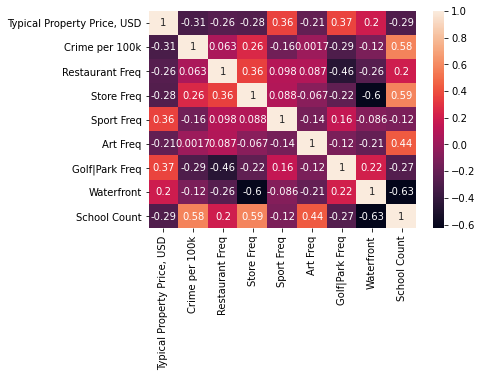

In [64]:
#import libraries
import seaborn as sn
import matplotlib.pyplot as plt


corrMatrix = mia_merged.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Looking at correlation table above, it is clear that to have Waterfront or Golf course or Park or a lot of places to excercise in the vicinity has a positive correlation; on the other hand, high violent crime rate per population or number of restaurants/stores/art has a negative correlation with  property prices in Miami. This is unusual conclusion, but I could see how it  makes sense. Miami's nature is tourism. Given that the tourist influx brings a lot of foot traffic to restaurants/stores/art, these neighborhoods have a higher probability for the crime.

### 9.  Clustering of Neighborhoods

##### Run _k_-means algorithm to cluster the neighborhoods

In [65]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


print('Libraries imported.')

Libraries imported.


In [66]:
#create a new dataframe with key variables
mia_grouped_clustering = mia_merged.drop(["Neighborhood","City"], axis=1)

In [67]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mia_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:35] 


array([2, 2, 2, 3, 3, 3, 2, 2, 2, 4, 2, 3, 2, 2, 0, 2, 3, 2, 2, 2, 3, 2,
       3, 2, 2, 4, 4, 4, 4, 2, 3, 3, 1, 2, 2], dtype=int32)

In [68]:
# add clustering labels
mia_merged.insert(0, 'Cluster Labels', kmeans.labels_)

In [69]:
#let's see results. Sort them by cluster labels and property prices
mia_merged_sorted=mia_merged.sort_values(by=["Cluster Labels", "Typical Property Price, USD"],ascending=True)
#clean table by getting rid of Latitude and longitude

#reset index
mia_merged_sorted.reset_index(drop=True, inplace=True)
mia_merged_sorted.head()

Cluster Labels  Typical Property Price, USD     Neighborhood  \
0               0                3,798,735.000  Hibiscus Island   
1               1               28,298,329.000      Star Island   
2               2                  210,996.000    Little Havana   
3               2                  212,994.000         Overtown   
4               2                  257,367.000  Flamingo Lummus   

   Crime per 100k  Restaurant Freq  Store Freq  Sport Freq  Art Freq  \
0             237            0.110       0.012       0.098     0.000   
1             237            0.273       0.078       0.104     0.000   
2             585            0.303       0.224       0.000     0.092   
3             851            0.400       0.110       0.060     0.170   
4             852            0.320       0.110       0.050     0.040   

   Golf|Park Freq  Waterfront         City  School Count  
0           0.049           1  Miami Beach             0  
1           0.052           1  Miami Beach             1  
2           0.039           0        Miami             5  
3           0.010           0        Miami            10  
4           0.020           1  Miami Beach             2

In [70]:
reordered_cols=["Cluster Labels","Neighborhood","City","Typical Property Price, USD",'Restaurant Freq','Store Freq','Sport Freq','Art Freq','Golf|Park Freq','Waterfront','School Count','Crime per 100k']

In [71]:
#reorder columns
mia_merged_sorted = mia_merged_sorted[reordered_cols]
mia_merged_sorted.head()

Cluster Labels     Neighborhood         City  Typical Property Price, USD  \
0               0  Hibiscus Island  Miami Beach                3,798,735.000   
1               1      Star Island  Miami Beach               28,298,329.000   
2               2    Little Havana        Miami                  210,996.000   
3               2         Overtown        Miami                  212,994.000   
4               2  Flamingo Lummus  Miami Beach                  257,367.000   

   Restaurant Freq  Store Freq  Sport Freq  Art Freq  Golf|Park Freq  \
0            0.110       0.012       0.098     0.000           0.049   
1            0.273       0.078       0.104     0.000           0.052   
2            0.303       0.224       0.000     0.092           0.039   
3            0.400       0.110       0.060     0.170           0.010   
4            0.320       0.110       0.050     0.040           0.020   

   Waterfront  School Count  Crime per 100k  
0           1             0             237  
1           1             1             237  
2           0             5             585  
3           0            10             851  
4           1             2             852

In [72]:
#add back gps coordinates to the dataframe
mia_merged = mia_merged[reordered_cols]
mia_merged["Latitude"]=mia_neigh["Latitude"]
mia_merged["Longitude"]=mia_neigh["Longitude"]


mia_merged


Cluster Labels              Neighborhood         City  \
0                2    Alameda - West Flagler        Miami   
1                2                Allapattah        Miami   
2                2                  Bayshore  Miami Beach   
3                3                Belle Isle  Miami Beach   
4                3           Biscayne Island        Miami   
5                3            Biscayne Point  Miami Beach   
6                2                  Brickell        Miami   
7                2               City Center  Miami Beach   
8                2                 Coral Way        Miami   
9                4            Di Lido Island  Miami Beach   
10               2                  Downtown        Miami   
11               3                 Fair Isle        Miami   
12               2                   Flagami        Miami   
13               2           Flamingo Lummus  Miami Beach   
14               0           Hibiscus Island  Miami Beach   
15               2          Isle of Normandy  Miami Beach   
16               3                  La Gorce  Miami Beach   
17               2              Liberty City        Miami   
18               2              Little Haiti        Miami   
19               2             Little Havana        Miami   
20               3                  Nautilus  Miami Beach   
21               2               North Shore  Miami Beach   
22               3  North-East Coconut Grove        Miami   
23               2                Oceanfront  Miami Beach   
24               2                  Overtown        Miami   
25               4               Palm Island  Miami Beach   
26               4          Rivo Alto Island  Miami Beach   
27               4          San Marco Island        Miami   
28               4         San Marino Island  Miami Beach   
29               2                Shenandoah        Miami   
30               3              South Pointe  Miami Beach   
31               3  South-West Coconut Grove        Miami   
32               1               Star Island  Miami Beach   
33               2            Upper Eastside        Miami   
34               2       Wynwood - Edgewater        Miami   

    Typical Property Price, USD  Restaurant Freq  Store Freq  Sport Freq  \
0                   397,024.000            0.441       0.215       0.000   
1                   288,712.000            0.250       0.304       0.018   
2                   560,268.000            0.300       0.060       0.010   
3                   685,340.000            0.360       0.220       0.100   
4                   971,736.000            0.208       0.052       0.042   
5                   977,991.000            0.361       0.103       0.010   
6                   392,743.000            0.480       0.140       0.060   
7                   327,291.000            0.350       0.170       0.000   
8                   482,235.000            0.480       0.180       0.040   
9                 4,730,846.000            0.409       0.091       0.136   
10                  351,345.000            0.480       0.120       0.030   
11                  761,856.000            0.484       0.161       0.000   
12                  341,027.000            0.378       0.257       0.014   
13                  257,367.000            0.320       0.110       0.050   
14                3,798,735.000            0.110       0.012       0.098   
15                  289,870.000            0.400       0.120       0.010   
16                2,028,854.000            0.203       0.068       0.017   
17                  282,969.000            0.194       0.387       0.032   
18                  370,677.000            0.400       0.200       0.074   
19                  210,996.000            0.303       0.224       0.000   
20                1,012,608.000            0.263       0.070       0.018   
21                  288,333.000            0.333       0.065       0.011   
22                  714,243.000            0.380       0.23

Finally, let's visualize the resulting clusters

In [73]:
# create map
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mia_merged['Latitude'], mia_merged['Longitude'], mia_merged['Neighborhood'], mia_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)
       
map_clusters2

## Results and Discussion <a name="results"></a>
### 10. Provide Descriptions to the Clusters Based on the Results

My analysis shows 35 neighborhoods in Miami and Miami Beach area with a massive difference in typical property prices. To illustrate, typical homes in Star Island worth USD 28 mln, while Little Havana homes worth only USD 200k. This is a vast price delta of almost 150 times! To understand the reason, I put together detailed descriptions of each neighborhood: 1) map visualization, 2) top 10 most frequent venues table, 3) Density of the essential categories such as restaurants, schools, gyms, cultural activities, shopping, and availability of golf course or beach in the vicinity.4) I also run correlation between independent factors vs. property prices 5) run a k-means clustering algorithm to group the neighborhoods into clusters. 


The above analysis revealed the following: the most expensive neighborhoods in the Miami area have a central location -- conveniently located btw touristy South Beach and arty/foodie Downtown Miami. They all have a waterfront (which I define as either to have waterview or beach) and golf course or park in the vicinity. So, in that sense, the famous real estate axiom "Location, location, and location" proved to be true.  On the other hand, I had a surprising finding from the correlation table that the frequency of restaurants/stores/art/schools negatively correlates with property prices in Miami. But I could see how it makes sense. First, we don't know the rankings of those venues. Just to have density doesn't imply quality. Second, Miami's nature is tourism. Given that the tourist influx brings a lot of foot traffic to specific neighborhoods, this creates a high probability of crime. Indeed, crime rates negatively correlate with property prices and have a positive correlation with restaurants/stores/art factors.  The number of schools also doesn't affect high-end real estate market. This is probably because of the demographics of high-net-worth individuals. They are usually not full-time residents of Miami. That's why most of these buyers are after the convenience of the location and fantastic water views.


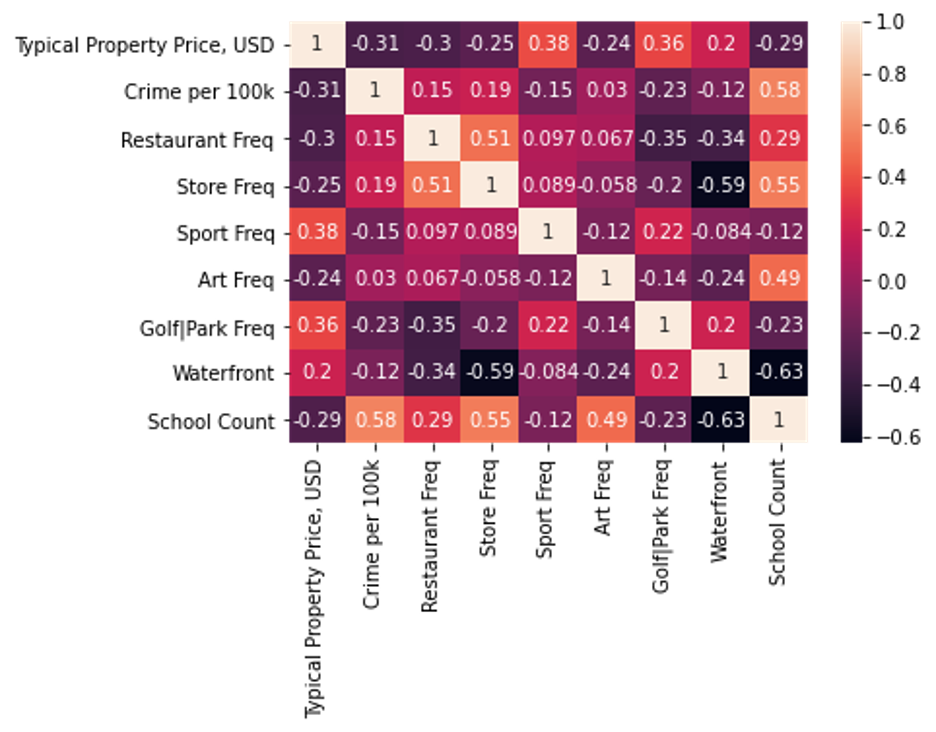

Let me again pull up here the dataframe of top 10 most frequent venue categories for each neighborhood. This will be good to keep in mind, while looking at results of k-clustering algorithm. This will help us provide descriptions for different neighborhood clusters of Miami.

In [74]:
neighborhoods_venues_sorted

Neighborhood      1st Most Common Venue 2nd Most Common Venue  \
0     Alameda - West Flagler  Latin American Restaurant      Cuban Restaurant   
1                 Allapattah  Latin American Restaurant      Cuban Restaurant   
2                   Bayshore                      Hotel                 Beach   
3                 Belle Isle       Gym / Fitness Center   American Restaurant   
4            Biscayne Island              Boat or Ferry           Cruise Ship   
5             Biscayne Point                      Beach                 Hotel   
6                   Brickell                      Hotel    Italian Restaurant   
7                City Center                      Hotel                 Beach   
8                  Coral Way                       Café   American Restaurant   
9             Di Lido Island                        Bar                  Park   
10                  Downtown                      Hotel    Italian Restaurant   
11                 Fair Isle       Caribbean Restaurant         Grocery Store   
12                   Flagami           Cuban Restaurant  Fast Food Restaurant   
13           Flamingo Lummus                      Hotel                 Beach   
14           Hibiscus Island              Boat or Ferry           Cruise Ship   
15          Isle of Normandy                Pizza Place                 Hotel   
16                  La Gorce                      Hotel                 Beach   
17              Liberty City        Fried Chicken Joint  Fast Food Restaurant   
18              Little Haiti         Italian Restaurant  Caribbean Restaurant   
19             Little Havana  Latin American Restaurant                Bakery   
20                  Nautilus                      Beach                 Hotel   
21               North Shore                      Beach                 Hotel   
22  North-East Coconut Grove                Pizza Place                  Park   
23                Oceanfront                      Hotel                 Beach   
24                  Overtown         Seafood Restaurant   American Restaurant   
25               Palm Island              Boat or Ferry       Harbor / Marina   
26          Rivo Alto Island        American Restaurant        Clothing Store   
27          San Marco Island              Boat or Ferry           Cruise Ship   
28         San Marino Island                    Exhibit                Museum   
29                Shenandoah           Cuban Restaurant            Smoke Shop   
30              South Pointe                      Hotel    Seafood Restaurant   
31  South-West Coconut Grove              Women's Store        Clothing Store   
32               Star Island              Boat or Ferry           Cruise Ship   
33            Upper Eastside         Italian Restaurant                  Park   
34       Wynwood - Edgewater                Art Gallery        Ice Cream Shop   

        3rd Most Common Venue    4th Most Common Venue  \
0        Fast Food Restaurant                 Pharmacy   
1              Clothing Store                Nightclub   
2                         Spa                Nightclub   
3               Grocery Store           Clothing Store   
4                 Art Gallery       Seafood Restaurant   
5          Italian Restaurant           Sandwich Place   
6          Seafood Restaurant   Argentinian Restaurant   
7              Clothing Store                      Bar   
8          Italian Restaurant      Japanese Restaurant   
9        Gym / Fitness Center      American Restaurant   
10         Seafood Restaurant      Peruvian Restaurant   
11   Mediterranean Restaurant              Candy Store   
12  Latin American Restaurant                 Pharmacy   
13                Pizza Place       Italian Restaurant   
14            Harbor / Marina                     Pool   
15         Italian Restaurant              Coffee Shop   
16                 Food Truck                   Resort   
17             Discount Store           Cosmetics Shop 

Now, I can examine each cluster and assign a name to each cluster. 

In [75]:
mia_merged_sorted

Cluster Labels              Neighborhood         City  \
0                0           Hibiscus Island  Miami Beach   
1                1               Star Island  Miami Beach   
2                2             Little Havana        Miami   
3                2                  Overtown        Miami   
4                2           Flamingo Lummus  Miami Beach   
5                2              Liberty City        Miami   
6                2               North Shore  Miami Beach   
7                2                Allapattah        Miami   
8                2          Isle of Normandy  Miami Beach   
9                2               City Center  Miami Beach   
10               2                   Flagami        Miami   
11               2                  Downtown        Miami   
12               2              Little Haiti        Miami   
13               2                  Brickell        Miami   
14               2    Alameda - West Flagler        Miami   
15               2       Wynwood - Edgewater        Miami   
16               2                Oceanfront  Miami Beach   
17               2                 Coral Way        Miami   
18               2            Upper Eastside        Miami   
19               2                Shenandoah        Miami   
20               2                  Bayshore  Miami Beach   
21               3                Belle Isle  Miami Beach   
22               3  North-East Coconut Grove        Miami   
23               3              South Pointe  Miami Beach   
24               3                 Fair Isle        Miami   
25               3  South-West Coconut Grove        Miami   
26               3           Biscayne Island        Miami   
27               3            Biscayne Point  Miami Beach   
28               3                  Nautilus  Miami Beach   
29               3                  La Gorce  Miami Beach   
30               4            Di Lido Island  Miami Beach   
31               4          San Marco Island        Miami   
32               4          Rivo Alto Island  Miami Beach   
33               4               Palm Island  Miami Beach   
34               4         San Marino Island  Miami Beach   

    Typical Property Price, USD  Restaurant Freq  Store Freq  Sport Freq  \
0                 3,798,735.000            0.110       0.012       0.098   
1                28,298,329.000            0.273       0.078       0.104   
2                   210,996.000            0.303       0.224       0.000   
3                   212,994.000            0.400       0.110       0.060   
4                   257,367.000            0.320       0.110       0.050   
5                   282,969.000            0.194       0.387       0.032   
6                   288,333.000            0.333       0.065       0.011   
7                   288,712.000            0.250       0.304       0.018   
8                   289,870.000            0.400       0.120       0.010   
9                   327,291.000            0.350       0.170       0.000   
10                  341,027.000            0.378       0.257       0.014   
11                  351,345.000            0.480       0.120       0.030   
12                  370,677.000            0.400       0.200       0.074   
13                  392,743.000            0.480       0.140       0.060   
14                  397,024.000            0.441       0.215       0.000   
15                  401,578.000            0.410       0.260       0.050   
16                  449,860.000            0.290       0.050       0.010   
17                  482,235.000            0.480       0.180       0.040   
18                  506,184.000            0.422       0.157       0.084   
19                  548,980.000            0.520       0.190       0.000   
20                  560,268.000            0.300       0.060       0.010   
21                  685,340.000            0.360       0.220       0.100   
22                  714,243.000            0.380       0.23

**"Upscale Islands"**

Location is in between Miami Beach and Miami. 

* Star (Cluster 1 =purple color) – typical home price USD 28mln
* Palm and other Venetian Islands (cluster 4=orange colors) -– typical home price USD 4-5.5mln
* Hibiscus (Cluster 2= red color) - typical home price USD 3.8mln


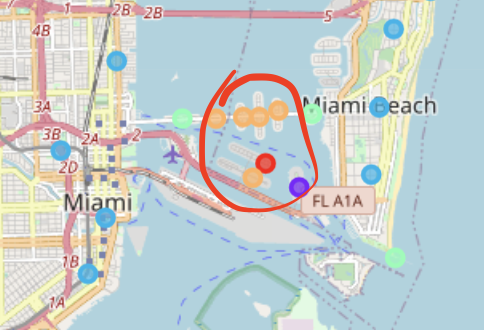

In [76]:
clusters=[0,1,4]
cluster_upscale=mia_merged_sorted[mia_merged_sorted['Cluster Labels'].isin(clusters)]
cluster_upscale.sort_values(by=["Typical Property Price, USD"],ascending=False)
cluster_upscale

Cluster Labels       Neighborhood         City  \
0                0    Hibiscus Island  Miami Beach   
1                1        Star Island  Miami Beach   
30               4     Di Lido Island  Miami Beach   
31               4   San Marco Island        Miami   
32               4   Rivo Alto Island  Miami Beach   
33               4        Palm Island  Miami Beach   
34               4  San Marino Island  Miami Beach   

    Typical Property Price, USD  Restaurant Freq  Store Freq  Sport Freq  \
0                 3,798,735.000            0.110       0.012       0.098   
1                28,298,329.000            0.273       0.078       0.104   
30                4,730,846.000            0.409       0.091       0.136   
31                4,928,254.000            0.167       0.000       0.000   
32                4,977,389.000            0.420       0.200       0.100   
33                5,274,093.000            0.083       0.000       0.000   
34                5,536,186.000            0.227       0.000       0.045   

    Art Freq  Golf|Park Freq  Waterfront  School Count  Crime per 100k  
0      0.000           0.049           1             0             237  
1      0.000           0.052           1             1             237  
30     0.000           0.068           1             0             237  
31     0.033           0.033           1             0             237  
32     0.010           0.030           1             0             237  
33     0.000           0.083           1             0             237  
34     0.091           0.091           1             0             237

Looking at the map, we can see that all of these neighborhoods are small islands, which are right next to each other. They are conveniently located at the center between touristy Miami Beach (aka South Beach) and arty/foodie Miami (aka Downtown Miami). Looking at the top 10 venues in these islands, we can see that these upscale areas filled with water views, spas, places to exercise, and nearby hotels. They all have a golf course or park in the vicinity. The violent crime rate is 50% less than the average of Miami. These locations obviously comes with the price. The k-cluster algorithm rightly put Star Island in its own cluster (1) as it is especially expensive (typical property value here is USD 28mln!) as the houses here are much bigger than other islands and this island has some celebrity owners (hence the neighborhood’s name).

**"High-End Residential Neighborhoods”** 
 

These neighborhoods are in South Beach and Coconut Grove by the water and near golf courses. Mostly houses with typical property prices of USD 1 million

Cluster 3 = (pale green color dots encircled in red)

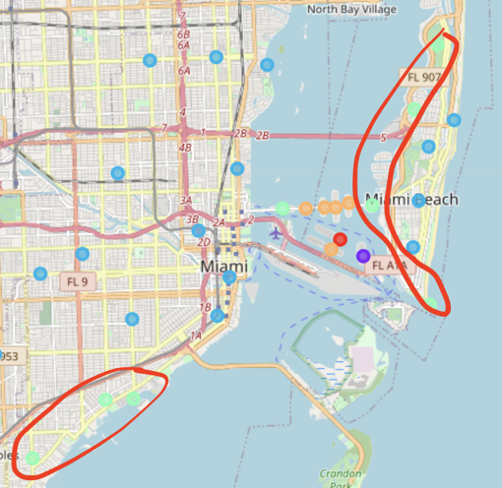

In [77]:
mia_merged_sorted.loc[mia_merged_sorted['Cluster Labels'] == 3]

Cluster Labels              Neighborhood         City  \
21               3                Belle Isle  Miami Beach   
22               3  North-East Coconut Grove        Miami   
23               3              South Pointe  Miami Beach   
24               3                 Fair Isle        Miami   
25               3  South-West Coconut Grove        Miami   
26               3           Biscayne Island        Miami   
27               3            Biscayne Point  Miami Beach   
28               3                  Nautilus  Miami Beach   
29               3                  La Gorce  Miami Beach   

    Typical Property Price, USD  Restaurant Freq  Store Freq  Sport Freq  \
21                  685,340.000            0.360       0.220       0.100   
22                  714,243.000            0.380       0.230       0.080   
23                  744,609.000            0.432       0.084       0.042   
24                  761,856.000            0.484       0.161       0.000   
25                  891,841.000            0.350       0.360       0.080   
26                  971,736.000            0.208       0.052       0.042   
27                  977,991.000            0.361       0.103       0.010   
28                1,012,608.000            0.263       0.070       0.018   
29                2,028,854.000            0.203       0.068       0.017   

    Art Freq  Golf|Park Freq  Waterfront  School Count  Crime per 100k  
21     0.040           0.030           1             0             237  
22     0.000           0.040           0             2             233  
23     0.011           0.021           2             1             852  
24     0.032           0.032           1             1             187  
25     0.010           0.020           0             4             368  
26     0.146           0.042           1             2             237  
27     0.021           0.041           2             1             852  
28     0.035           0.000           1             2             852  
29     0.000           0.034           1             0             237

Miami Beach neighborhoods have condos and a higher crime rate given it is at the heart of tourism. Coconut Grove mostly houses, this area is quieter with less crime and more schools nearby. Both areas are by the water and next to golf courses, but much more livable than upscale island cluster. They have higher restaurants density. The typical property prices here around USD 1mln, according to Zillow's may'21 data.

**Mid and Lower Tier Residential Neighborhoods = Cluster 2**

Cluster 2 is very large and represents 19 out 35 neighborhoods in Miami. The k-means clustering algorithm rightly picked up that property prices here are much lower, below USD 500k. Here majority of full time residents live and work. Let's review and break them down in more detail. 

***“Mid-Tier Neighborhoods of Miami Beach”***

Cluster 2 are blue color dots encircled in red. Typical home price USD 300-500k. Only Miami Beach Neighborhoods.

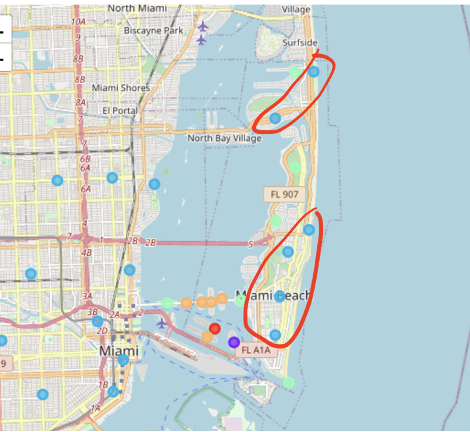

In [78]:
cluster_2=mia_merged_sorted.loc[mia_merged_sorted['Cluster Labels'] == 2]
cluster_2.sort_values(by=["Typical Property Price, USD"],ascending=False)
cluster_2.loc[cluster_2["City"]=="Miami Beach"]

Cluster Labels      Neighborhood         City  \
4                2   Flamingo Lummus  Miami Beach   
6                2       North Shore  Miami Beach   
8                2  Isle of Normandy  Miami Beach   
9                2       City Center  Miami Beach   
16               2        Oceanfront  Miami Beach   
20               2          Bayshore  Miami Beach   

    Typical Property Price, USD  Restaurant Freq  Store Freq  Sport Freq  \
4                   257,367.000            0.320       0.110       0.050   
6                   288,333.000            0.333       0.065       0.011   
8                   289,870.000            0.400       0.120       0.010   
9                   327,291.000            0.350       0.170       0.000   
16                  449,860.000            0.290       0.050       0.010   
20                  560,268.000            0.300       0.060       0.010   

    Art Freq  Golf|Park Freq  Waterfront  School Count  Crime per 100k  
4      0.040           0.020           1             2             852  
6      0.022           0.032           1             1             852  
8      0.020           0.040           2             2             852  
9      0.050           0.010           1             2             852  
16     0.040           0.010           1             2             852  
20     0.040           0.020           1             3             852

These neighborhoods are all in Miami Beach with nearby waterfronts. Given these are in the heart of touristy areas, they have so much to offer: a lot of restaurants, bars, hotels in the vicinity. But this comes with a price of higher-than-normal crime rate and smaller condo apartments. So typical property prices are around $300-500k.

***“Mid-Tier Neighborhoods of Miami”***

Cluster 2 blue color dots encircled in red. Typical home price USD 200-500k


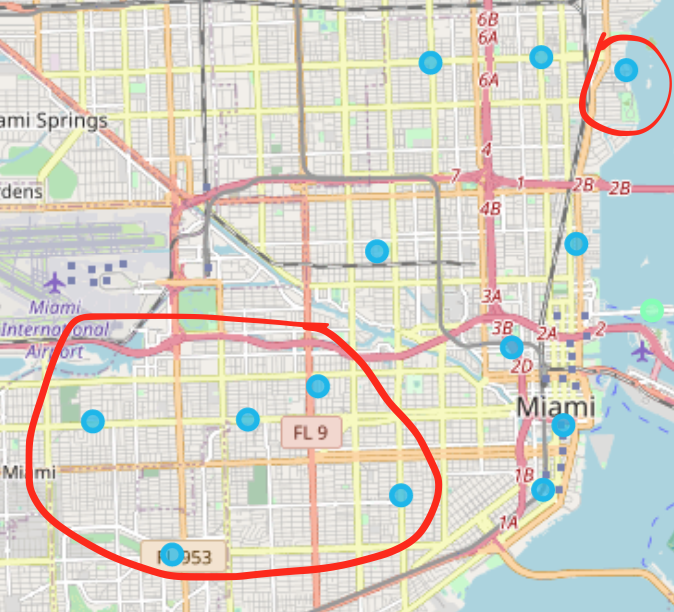

In [79]:
cluster_2=mia_merged_sorted.loc[mia_merged_sorted['Cluster Labels'] == 2]
cluster_2.sort_values(by=["Typical Property Price, USD"],ascending=False)
cluster_2.loc[cluster_2["City"]=="Miami"]
cluster_2.loc[cluster_2["Crime per 100k"]<782]


Cluster Labels            Neighborhood   City  \
2                2           Little Havana  Miami   
10               2                 Flagami  Miami   
14               2  Alameda - West Flagler  Miami   
17               2               Coral Way  Miami   
18               2          Upper Eastside  Miami   
19               2              Shenandoah  Miami   

    Typical Property Price, USD  Restaurant Freq  Store Freq  Sport Freq  \
2                   210,996.000            0.303       0.224       0.000   
10                  341,027.000            0.378       0.257       0.014   
14                  397,024.000            0.441       0.215       0.000   
17                  482,235.000            0.480       0.180       0.040   
18                  506,184.000            0.422       0.157       0.084   
19                  548,980.000            0.520       0.190       0.000   

    Art Freq  Golf|Park Freq  Waterfront  School Count  Crime per 100k  
2      0.092           0.039           0             5             585  
10     0.000           0.027           0             4             227  
14     0.032           0.032           0             4             269  
17     0.020           0.010           0             2             187  
18     0.048           0.048           0             2             751  
19     0.100           0.030           0             4             187

Neighborhoods: Shenandoah, Coral Way, Alameda-West Flagler, Flagami, Upper Eastside, Little Havana. Typical prices of USD 300-500k. No beach, but some golf or park in the vicinity. They are mostly residential because have high density of stores and restaurants. A lot of public schools in the area. Good density of cultural actitivities as well. The crime rate is lower than Miami Beach but higher than Upscale islands. 

***”Trendy Miami Neighborhoods”***

These neighborhoods despite high crime rate still have mid-tier property prices of around USD 400k. 

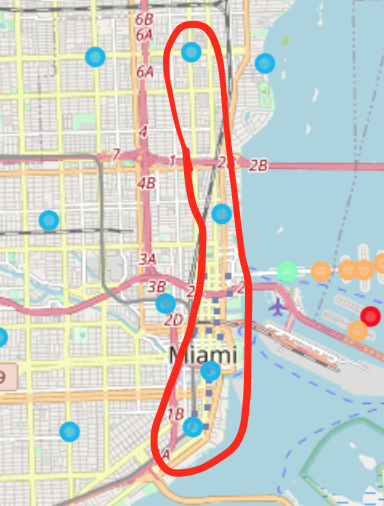

In [80]:
cluster_2=mia_merged_sorted.loc[mia_merged_sorted['Cluster Labels'] == 2]
cluster_3=cluster_2.loc[cluster_2["Typical Property Price, USD"]>350000]
cluster_4=cluster_3.loc[cluster_3["Crime per 100k"]>=782]
cluster_4=cluster_4.loc[cluster_4["City"]=="Miami"]
exclude=cluster_4[cluster_4["Neighborhood"]=="Little Haiti"].index
cluster_4.drop(exclude, inplace=True)
cluster_4

Cluster Labels         Neighborhood   City  Typical Property Price, USD  \
11               2             Downtown  Miami                  351,345.000   
13               2             Brickell  Miami                  392,743.000   
15               2  Wynwood - Edgewater  Miami                  401,578.000   

    Restaurant Freq  Store Freq  Sport Freq  Art Freq  Golf|Park Freq  \
11            0.480       0.120       0.030     0.030           0.020   
13            0.480       0.140       0.060     0.000           0.000   
15            0.410       0.260       0.050     0.100           0.020   

    Waterfront  School Count  Crime per 100k  
11           0             5            1195  
13           0             2            1195  
15           0             8             782

These neighborhoods have historically been dangerous and still the violent crime rate is almost 3 of Miami average, but things are changing. Miami Police headquarter is between Overtown and Downtown. Despite the crime, these areas are considered to be trendy because each neighborhood has it's unique purpose. Downtown has business/government/museums, Brickell is business district and Wynwood is art district. Narrow strip along the water, these neighborhoods have high-rise condo residential developments along Brickell Ave, Biscayne Blvd and Edgewater of Wynwood. They have the highest density of restaurants and cultural activities in Miami. Yet the neighborhoods don't end there but go much more inland where unfortunately still a lot of poverty, homeless people and crime. There are no beach but some parks in the vicinity.

***“Dangerous  Lower-Tier Miami Neighborhoods”***

High Crime rate Miami inland areas: Liberty City, Allapattah, Little Haiti and Overtown.

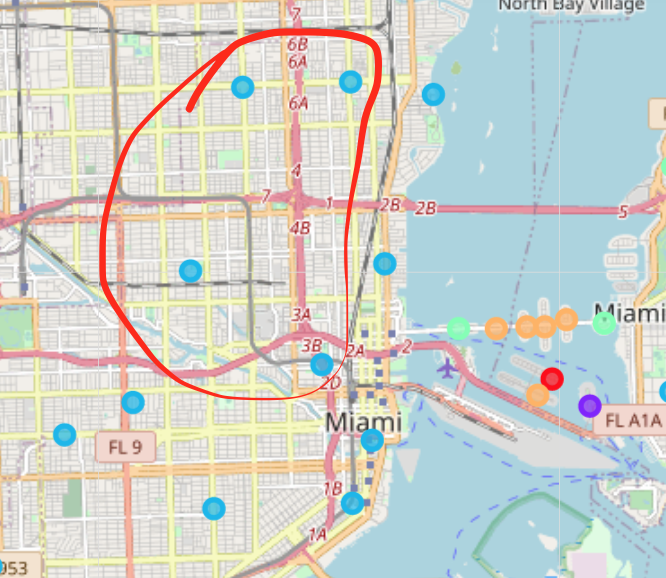

In [81]:
cluster_6=cluster_2.loc[cluster_2["Crime per 100k"]>=800]
cluster_6=cluster_6.loc[cluster_6["City"]=="Miami"]
exclude=cluster_6[cluster_6["Neighborhood"]=="Brickell"].index
cluster_6.drop(exclude, inplace=True)
exclude=cluster_6[cluster_6["Neighborhood"]=="Downtown"].index
cluster_6.drop(exclude, inplace=True)
cluster_6

Cluster Labels  Neighborhood   City  Typical Property Price, USD  \
3                2      Overtown  Miami                  212,994.000   
5                2  Liberty City  Miami                  282,969.000   
7                2    Allapattah  Miami                  288,712.000   
12               2  Little Haiti  Miami                  370,677.000   

    Restaurant Freq  Store Freq  Sport Freq  Art Freq  Golf|Park Freq  \
3             0.400       0.110       0.060     0.170           0.010   
5             0.194       0.387       0.032     0.000           0.065   
7             0.250       0.304       0.018     0.036           0.018   
12            0.400       0.200       0.074     0.053           0.011   

    Waterfront  School Count  Crime per 100k  
3            0            10             851  
5            0            10            1919  
7            0             4             944  
12           0             6            1138

These neighborhoods are poor and don't have any waterfront. More than double average crime rate of Miami. Liberty City is an especial case, with 1919 violent crimes per 100k people, it is considered to be one of the most dangerous neighborhoods in the US. Typical property prices here are USD 200-300k. Not surprisingly, Miami policy headquarter is located in Overtown.

## Conclusion <a name="conclusion"></a>


The purpose of this project was to identify the best neighborhoods in Miami to aid stakeholders in narrowing down the search for an optimal location to buy or rent a property. By calculating the density of schools, crime rates, restaurants, stores, sport, and cultural activities,  I could give a general quantitative description for each neighborhood.

I identified the following neighborhood clusters in Miami:

* "Upscale Islands": Star, Palm, and Venetian, Hibiscus islands in descending price order from USD 28 to 4mln (Houses only.) They are located conveniently between Miami Beach and Miami. They all have a waterfront and golf course or park in the vicinity. There are no stores or schools nearby but many places to go out for restaurants or exercise. The violent crime rate is 237 per 100k people, which is 50% less than the average of Miami. 

* "High-End Residential Neighborhoods": South Beach and Coconut Grove by the water and near golf courses. (Many are houses) Neighborhoods include Belle Isle, South Pointe, Nautilus, Biscayne Point, and La Gorce in Miami Beach; NE and SW Coconut Grove, and Fair Isle in Coconut Grove. Typical property prices are around USD 1 million, except La Gorce, which is $2mln (because it has its own golf club). These neighborhoods are more residential because they have double the frequency of "Upscale Islands" in the number of stores, restaurants, and schools nearby. The crime rate is very low, similar to "upscale Islands," except some Miami Beach neighborhoods such as South Pointe, Biscayne Point, and Nautilus, which have a violent crime rate of 850 per 100k people or 100% more than the average of Miami. These three neighborhoods are close to many touristy hotels and hence more foot traffic and crime in the vicinity.

* "Mid-Tier Neighborhoods of Miami Beach": North Shore, Isle of Normandy, Bayshore, Oceanfront, City Center, and Flamingo Lummus. Typical prices of USD 300-500k. Given they are in the heart of touristy areas, they have so much to offer: many restaurants, bars, hotels in the vicinity. But this comes with a price of double the average Miami crime rate and smaller condo apartments.

* "Mid-Tier Neighborhoods of Miami": Shenandoah, Coral Way, Alameda-West Flagler, Flagami, Upper Eastside, Little Havana. Typical prices of USD 400-550k. No beach but golf or park in the vicinity. They are more residential because they have a double frequency of "Upscale Islands" in stores, restaurants, and schools. The crime rate is lower than Miami Beach but higher than the Upscale islands.  They are excellent areas to live in for families.

* "Trendy  Neighborhoods": Downtown, Brickell, and Wynwood-Edgewater. Historically, these neighborhoods have been dangerous, and still, the violent crime rate is almost 3 of Miami's average, but things are changing. Miami Police headquarters are between Overtown and Downtown. Despite the crime, these areas are considered trendy because each neighborhood has its unique purpose. Downtown has business/government/museums, Brickell is a business district, and Wynwood is an art district. These neighborhoods have high-rise condo residential developments along the water along Brickell Ave, Biscayne Blvd, and Edgewater. They have the highest density of restaurants and cultural activities in Miami. Yet the neighborhoods don't end there but go much more inland, where unfortunately still poverty, homeless people, and crime. There is no beach but some parks in the vicinity.


* "Dangerous Lower-Tier Neighborhoods": Liberty City, Allapattah, Little Haiti, and Overtown. These neighborhoods are poor and don't have any waterfront. And have more than double the average crime rate of Miami. Liberty City is an exceptional case; with 1919 violent crimes per 100k people, it is considered one of the most dangerous neighborhoods in the US. Typical property prices here are USD 200-300k. Not surprisingly, Miami policy headquarter is located in Overtown.

The final decision on optimal property location is a complex process that entails many choices. I only cover some factors; others include noise levels, proximity to major roads, real estate availability, prices per square foot, area of the property, year build, social and economic dynamics, etc. 

My project focused on location factors such as availability and density of restaurants, schools, stores, art, places one could go to exercise, and crime rates. I identified that the waterfront, the availability of a park, golf course, places one could go to exercise, and the low crime rate significantly affects property prices. However,  the density of schools, restaurants, stores, and art negatively correlates with property prices.
This is surprising, but I could see how it makes sense. First, we don't know the rankings of schools/art/stores nearby. To have density doesn't imply quality. Second, Miami's nature is tourism. Tourist influx brings a lot of foot traffic and a high probability of crime to specific neighborhoods (South Beach, Downtown, Wynwood, and Brickell). Finally, the density of public schools doesn't affect the high-end real estate market. This is probably because of the demographics of high-net-worth individuals. They are usually not full-time residents of Miami. That's why most of these buyers are after the convenience of the location and fantastic water views. (see Upscale Islands or High-end residential clusters)


My results might be surprising for some Miami locals (including me) because the violent crime rate is higher than it is perceived. For example, the trendy neighborhood cluster (Downtown, Wynwood, and Brickell) has double Miami's average crime rate. This makes sense if you look on the map to see how Google API defines a particular neighborhood area. For example, according to Google Maps Brickell, Downtown, Wynwood/Edgewater areas are much bigger than the perceived narrow strip along the water. The neighborhoods don't end with high-rise luxury residential condominiums along Brickell Ave, Biscayne Blvd, and Edgewater, but go further inland. And here, unfortunately, we still have a lot of poverty, homeless people, and crime. 

I also see how I could improve on my data science research. First, I used almost two years old data from the FBI, which only published calendar 2020 data in September 2021. The situation might have improved since then. Second, it will be helpful to include the ranking of schools and restaurants and see if proximity to them affects property prices.

In conclusion, waterfront, a healthy lifestyle, and tourism define the Miami area real estate. These factors might not work in other cities, but one could use my data science methodology to discover what works in the city of their choice. 


